![UVic logo](https://res-2.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1406151713/wptak6xuezyh36b1hbty.png)

# **ECE 471/536 Spring 2023: Computer Vision**
## Assignment 2: Edge Detection and Keypoints
### Due date: TBD


> Student: Bhavanvir Rai, V00938954
---

## **1. Instructions:** follow the intructions provided on a sequential manner. 
### 1.0 **Identification** 
Please enter your name and V number on the text code above.

### 1.1 **Submission package**
Your final submission package must be submitted using the [BrightSpace](https://https://bright.uvic.ca/d2l/home)  platform. You will find this assignment's specific page under **Course Tools > Assignments**. Your submission package consists of a *.zip* file containing:

1.   *.ipynb* file: your modified version of this Google Colab template. Place your complete assignment solution/information in this version.  
2.   *.pdf* file: a document containing a writeup with the answers to mathematical questions. 

### 1.2 **Coding considerations**
* In previous years we asked students to complete assignments offline by installing either MATLAB or a Python environment in their computers. In order to standardize the submissions and guarantee that everyone has access to the same Python environment, all assignments are going to be described (by us) and completed (by you) using the same Google Colab reference template script.
* Google Colab offers a Python environment that can be accessed in your browser and executed using Google Cloud, so no local installation is necessary. It makes the setting-up process significantly easier! Please read [this quick tutorial](https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb) notebook on Google Colab/Python.

### 1.3 **Creating your Google Colab submission file**

* Modify this template with your solutions to the assignment. You will find "**TO-DO**" indicators throughout the assingment highlighting portions of the code you are asked to complete. 
* Only edit the provided templates in the bounds of the START TODO and END TODO flags.
* Colab notebooks are divided into individual cells. You can execute the code inside of a given cell by pressing **CTRL+ENTER**, or that of all cells by pressing **CTRL+F9**. Variables must be "executed" in a cell before being used by subsequent ones (the same goes for libraries imported). Note that some cells of this assignment contain flags that must by changed (and executed) before you move forward.
* If you completed the whole assignment, make sure that simply pressing "**CTRL+F9**" executes all cells correctly. **This is going to be the first marking step we will execute when evaluating your submission**.  

### 1.4 **Use of open source code**

* The use of small segments of freely-available code is permitted. However, it is **extremely important** that you indicate in your in-code comments where these are used, as well as their sources. Failure to do so can be considered plagiarism, which is a serious offence. Learn more about detection mechanisms and consequences of plagiarism at UVic [here](https://www.uvic.ca/library/research/citation/plagiarism/). Note that the programming assignments are designed so that most of their content should be created by you.     
* You can never include too many of these only too few. 
* A number of functions/algorithms are already implemented by libraries we will use (e.g., [OpenCV](https://opencv.org/), [scikit-learn](https://scikit-learn.org/stable/)), however you should not use them unless otherwise instructed to do so. Mannualy coding some of these function is an important part of the learning process.  


In [1]:
# ~~~~~~~START TODO~~~~~~~~~
READ_THE_INSTRUCTIONS_FLAG = True
# ~~~~~~~~END TODO~~~~~~~~~~

## **2. Mathematical and Theoretical Questions  (35 points)**

#### Answer all these questions in a seperate pdf!

1. Comment on your expected qualitative results for the Canny edge detection algorithm chosing values of [min_val, max_val] for [0,100], [25,100], [50,100], [100,100] respectively. Explain using your understanding of what the signifigance of min_val in the Canny algorithm. (5 points)
2. Why is non-maximal suppression used in the Canny algorithm? (5 points)
3. Why is hysteresis threasholding used in the Canny algorithm? (5 points)
4. How might one use the results of the Canny algorithm for the test image of the ECS building to determine man-made (buildings and pavement) vs natural (trees and grass) regions in the image? (10 points)
5. Compare and contrast the output of the Laplacian of Gaussian and the Sobel filters. Discuss why the Canny algorithm uses one over the other. (5 points)
6. Is a pixel belonging to an edge a good keypoint in an image? Why? (3 points)
7. Is a corner point a good keypoint in an image? Why? (2 points)
 



# **Quick downloading of material for assignment.**

In [2]:
import sys 
import os
import cv2 # imports OpenCV
import numpy as np
from matplotlib import pyplot as plt #imports matplotlib 
from google.colab.patches import cv2_imshow
%matplotlib inline
# You will NOT need to import any more libraries for ANY assignment. 

def pltImg(img, title=None, ori="horizontal", colorb = True):  # not mandatory, but useful
  plt.imshow(img)
  if colorb:
    plt.colorbar(orientation=ori)
  if title:
    plt.title(title)
  return plt


print('-'*40)
print ('Python version: {}'.format(sys.version))
print('OpenCV version: {}'.format(cv2.__version__))

if not READ_THE_INSTRUCTIONS_FLAG:
  raise Exception('Please go back and read the instructions.')
else:
  print('\nThank you for reading the instructions.')
print('-'*40)


# Here we simply download the needed images 
if os.path.isfile('./uvic_1.jpg'):
  print('Image file already downloaded.')
else:
  !wget "https://raw.githubusercontent.com/dash-uvic/ece471_536-S2022/main/images/A1/uvic_1.jpg"

if os.path.isfile('./gamma_original.jpg'):
  print('Image file already downloaded.')
else:
  !wget "https://raw.githubusercontent.com/dash-uvic/ece471_536-S2022/main/images/A1/gamma_original.jpg"

if os.path.isfile('./low_contrast.jpg'):
  print('Low-contrast image file already downloaded.')
else:
  !wget "https://raw.githubusercontent.com/dash-uvic/ece471_536-S2022/main/images/A1/low_contrast.jpg"

if os.path.isfile('./bw_target.jpg'):
  print('B&W target image already downloaded.')
else:
  !wget "https://raw.githubusercontent.com/dash-uvic/ece471_536-S2022/main/images/A1/bw_target.jpg"

if os.path.isfile('./6hNwn00.png'):
  print('Chessboard reference image already downloaded.')
else:
  !wget "https://i.imgur.com/6hNwn00.png"

----------------------------------------
Python version: 3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0]
OpenCV version: 4.6.0

Thank you for reading the instructions.
----------------------------------------
--2023-02-06 20:34:20--  https://raw.githubusercontent.com/dash-uvic/ece471_536-S2022/main/images/A1/uvic_1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 919735 (898K) [image/jpeg]
Saving to: ‘uvic_1.jpg’

uvic_1.jpg          100%[===================>] 898.18K  --.-KB/s    in 0.008s  

2023-02-06 20:34:20 (109 MB/s) - ‘uvic_1.jpg’ saved [919735/919735]

--2023-02-06 20:34:20--  https://raw.githubusercontent.com/dash-uvic/ece471_536-S2022/main/images/A1/gamma_original.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.1

# **Programming: Canny Edge Detection and Fast Feature/Keypoint Selection (55 points)**


# Referance This Document for The Canny Algorithm
https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html

Low pass filtering (Gaussian Filter)

[[0.10186806 0.11543164 0.10186806]
 [0.11543164 0.13080118 0.11543164]
 [0.10186806 0.11543164 0.10186806]]
[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]
[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]
0.9999999999999998
input (510, 960) output (510, 960)


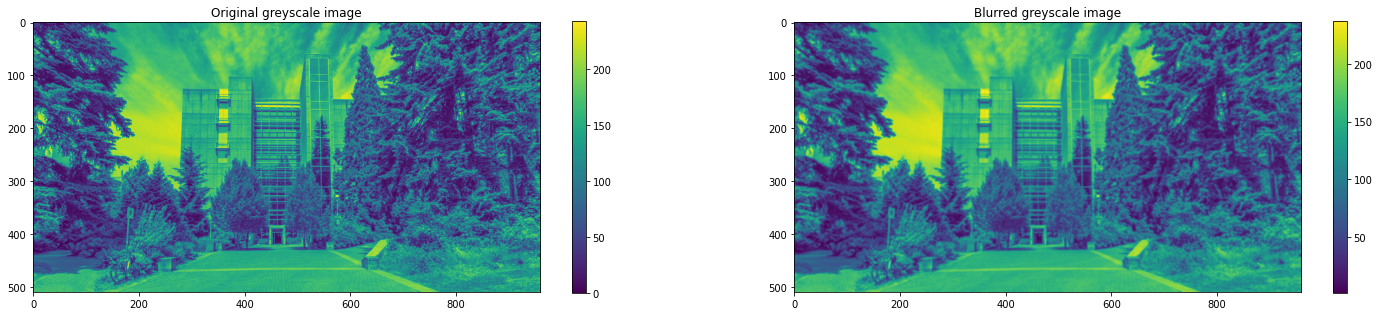

In [80]:
def apply_convolutional_filter(image, kernel):
  # ~~~~~~~START TODO~~~~~~~~~
  # (5 points): Create a function to apply a kernel to an image using convolution. 
  # You may NOT use the np.convolve or np.pad functions. 
  # The type of convolution must be zero padded same. 
  # Therefore the output shape should be the same as the input.
  result = cv2.filter2D(image, -1, kernel)
  return result
  # ~~~~~~~~END TODO~~~~~~~~~~

def gaussian(size,sigma):
  # ~~~~~~~START TODO~~~~~~~~~
  # (5 points): Create a function which returns an appropriate gaussian filter
  # Ensure the output of your kernel has a sum of 1! 
  # The formula should be of the form G(x,y) = exp(-(x^2+y^2)/(2*sigma^2))/(2*pi*sigma^2)
  interval = (size-1)//2
  x, y = np.mgrid[-interval:interval+1, -interval:interval+1]
  G = 1/(2*np.pi*sigma**2)*np.exp(-((x**2 + y**2)/(2 * sigma**2)))
  normalized = G/np.sum(G)
  return normalized
  # ~~~~~~~~END TODO~~~~~~~~~~


# ~~~~~~~START TODO~~~~~~~~~
# (3 points): Read the image at './uvic_1.jpg' and convert it to greyscale.
# You do not need to convert the image to grayscale manually.
# Re-scale the iamge down by a factor of 1/2.
# Then convert the image to a float 
# Finally create gaussian filters with size 3 and sigma 2 and size 3 and sigma 1.
# Print these gaussian filters.
im = cv2.imread('./uvic_1.jpg')
imGrey = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

width = int(imGrey.shape[1]*0.5)
height = int(imGrey.shape[0]*0.5)
newSize = (width, height)
imResized = cv2.resize(imGrey, newSize, interpolation=cv2.INTER_AREA)
img = imResized.astype(float)

size3Sigma2 = gaussian(3, 2)
size3Sigma1 = gaussian(3, 1)
print(size3Sigma2)
print(size3Sigma1)
# ~~~~~~~~END TODO~~~~~~~~~~


# ~~~~~~~START TODO~~~~~~~~~
# (2 points): Apply a gaussian kernel on your
# down-scalled normalized image.
# Use a kernel size of 5 and a sigma of 1.
# Print your kernel and it's sum as well as the input and output image sizes.  
size5Sigma1 = gaussian(5, 1)
print(size5Sigma1)
# np.sum(size5Sigma1) returns 1.0 in this case, so manually summation is required
kernelSum = float()
for x in size5Sigma1:
  for y in x:
    kernelSum += y
print(kernelSum)

blurred = apply_convolutional_filter(img, size5Sigma1)
print("input {} output {}".format(img.shape, blurred.shape))
# ~~~~~~~~END TODO~~~~~~~~~~


plt.figure(figsize = (25,5))
plt.subplot(1, 2, 1)
plt = pltImg(img,title="Original greyscale image", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(blurred,title = "Blurred greyscale image", ori='vertical')



Image Gradients 

In [ ]:
# ~~~~~~~START TODO~~~~~~~~~
# (3 points): Generate two 3x3 sobel filters for vertical and horizontal edges.
# Apply these filters to the blurred greyscale image from the previous section.

# ~~~~~~~~END TODO~~~~~~~~~~

# ~~~~~~~START TODO~~~~~~~~~
# (2 points): Generate a 3x3 Laplacian of Gaussian filter for vertical and horizontal edges.
# Apply this filter to the blurred greyscale image from the previous section.

# ~~~~~~~~END TODO~~~~~~~~~~


plt.figure(figsize = (25,5))
plt.subplot(1, 2, 1)
plt = pltImg(vertical,title= "Vertical Sobel", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(horizontal,title = "Horizontal Sobel", ori='vertical')
plt.figure(figsize = (15,7))
plt = pltImg(LOG_image,title="Laplacian of Gaussian", ori='vertical')


Non-Maximal Supression

In [ ]:
from numpy.ma.core import zeros_like

def non_maximal_suppression(gradient_magnitudes, gradient_directions):
  # ~~~~~~~START TODO~~~~~~~~~
  # (11 points): In this function you will generate a filtered gradient magnitude map.
  # All gradients which are non-maximal along the gradient direction 
  # (normal to the edge) should be set to zero in the output gradient magnitude.
  # The output should be the same size as the input, you can ignore gradients 
  # at the edge of the iamge and leave them unchanged. 
  

  # ~~~~~~~~END TODO~~~~~~~~~~

# ~~~~~~~START TODO~~~~~~~~~
# (2 points): Use the horizontal and vertical gradients to generate the 
# gradient magnitudes and directions.

# ~~~~~~~~END TODO~~~~~~~~~~


suppressed_magnitudes = non_maximal_suppression(magnitudes.copy(), directions.copy())
print(int(np.sum(magnitudes)), int(np.sum(suppressed_magnitudes)))

plt.figure(figsize = (25,5))
plt.subplot(1, 2, 1)
plt = pltImg(magnitudes,title= "Magnitude", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(directions,title = "Direction", ori='vertical')

plt.figure(figsize = (25,5))
plt.subplot(1, 2, 1)
plt = pltImg(magnitudes,title= "Magnitude", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(suppressed_magnitudes,title = "Non-Maximal Suppressed Magnitude (Thin Edges)", ori='vertical')

Hysteresis Threasholding

In [ ]:
def threasholding(magnitudes, low_threash, high_thresh):
  # ~~~~~~~START TODO~~~~~~~~~
  # (2 points): Threshold the magnitude images into a tertiary image
  # where 0 is no edge, 1 is possible edge and 2 is definte edge based on the 
  # passed threasholds.

  # ~~~~~~~~END TODO~~~~~~~~~~

threasholded_edges = threasholding(suppressed_magnitudes.copy(), 50,100)

plt.figure(figsize = (25,5))
plt.subplot(1, 2, 1)
plt = pltImg(suppressed_magnitudes,title= "Magnitude", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(threasholded_edges,title = "Thresholded Edges", ori='vertical')

In [ ]:
def hysteresis(edges):
  # ~~~~~~~START TODO~~~~~~~~~
  # (5 points): Create binary image of edges.
  # Ensure any weak edge which connects to a strong edge is returned as a strong edge.
  # The input is your ternary image from the previous block.
  # A recursive helper function may be useful here!

      
  # ~~~~~~~~END TODO~~~~~~~~~~

final_edges = hysteresis(threasholded_edges.copy())

plt.figure(figsize = (25,5))
plt.subplot(1, 2, 1)
plt = pltImg(threasholded_edges,title= "Thresholded Edges", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(final_edges,title = "Final Edges", ori='vertical')

# **3. Keypoint Extraction using FAST!**

# Use this article for details on the fast algorithm
https://docs.opencv.org/3.4/df/d0c/tutorial_py_fast.html
We will only be implementing FAST Feature Detection only, not the Machine Learning a Corner Detector or the Non-Maximal Supression. 

In [ ]:
def fast_keypoint(image, theashold, n):
  # ~~~~~~~START TODO~~~~~~~~~
  # (5 points): create a list of points in the image which are 
  # FAST keypoints in the image based on the FAST keypoint criteria.
  # You can ignore the edges of the image where the test would 
  # require access out of image size.
  # The output keypoints should be a list of points like:
  # [(y_1,x_1),(y_2,x_2),....]

  # ~~~~~~~~END TODO~~~~~~~~~~
  return keypoints

img = cv2.imread('6hNwn00.png', cv2.IMREAD_GRAYSCALE)
kps = fast_keypoint(img, 10, 9)
print(len(kps))
img_RGB = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for kp in kps:
  cv2.circle(img_RGB, kp, 3, [0,0,255])

plt.figure(figsize = (15,7))
plt = pltImg(img_RGB,title="Chessboard Keypoints", ori='vertical')


In [ ]:
def fix_chessboard_rotation(kps):
  # ~~~~~~~START TODO~~~~~~~~~
  # (10 points): Using the keypoints you previously generated 
  # create a function to compensate the rotation of this chessboard
  # so edges are parallel with the edges of the image. 
  # Return the rotation angle required to compensate the rotation of the chessboard.
  # We will accept any rotation that is off by some multiple of 90 degrees, for 
  # example if it is upside down.
  # The returned rotation angle should be in degrees.
  # Your solution should be general for any rotation of this chessboard image.
  # It does not need to handel any translations or rotations on non-centerpoints.

  # ~~~~~~~~END TODO~~~~~~~~~~
  return roatation_angle


(h, w) = img_RGB.shape[:2]
(cX, cY) = (w // 2, h // 2)
angle = fix_chessboard_rotation(kps)
print(angle)
M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
rotated = cv2.warpAffine(img_RGB, M, (w, h))

plt.figure(figsize = (25,5))
plt.subplot(1, 2, 1)
plt = pltImg(img_RGB,title= "Chessboard Keypoints", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(rotated,title = "Chessboard Keypoints Rotated", ori='vertical')

**End of the assignment!**